In [1]:
#import in libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import *
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_excel("F:\lm advertising\\dataset_Facebook.xlsx")
data.head()

,Page total likes,Advertisement Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime ad Total Reach,Lifetime ad Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime ad Consumptions,Lifetime ad Impressions by people who have liked your Page,Lifetime ad reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,130791,Photo,1,7,2,13,0,44464,66824,1052,930,1571,22904,14080,559,4,154.0,30.0,188
1,119198,Photo,3,5,2,12,0,2718,4698,566,528,663,3601,1992,306,0,50.0,10.0,60
2,131300,Photo,3,2,5,4,0,9703,5379,2664,439,155,12667,592,380,3,63.0,22.0,211
3,124940,Photo,3,6,5,3,1,11608,15323,985,705,940,8419,5840,594,4,330.0,29.0,363
4,135713,Photo,2,10,4,1,0,5568,10282,746,545,867,5696,3162,537,13,319.0,55.0,387


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     746 non-null    int64  
 1   Advertisement Type                                                   746 non-null    object 
 2   Category                                                             746 non-null    int64  
 3   Post Month                                                           746 non-null    int64  
 4   Post Weekday                                                         746 non-null    int64  
 5   Post Hour                                                            746 non-null    int64  
 6   Paid                                                                 746 non-null    int64  
 7   Lifetime

In [4]:
data=data.replace({"Advertisement Type":{"Photo":1,"Status":2,"Video":3,"Link":4}})

data.head()

,Page total likes,Advertisement Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime ad Total Reach,Lifetime ad Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime ad Consumptions,Lifetime ad Impressions by people who have liked your Page,Lifetime ad reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,130791,1,1,7,2,13,0,44464,66824,1052,930,1571,22904,14080,559,4,154.0,30.0,188
1,119198,1,3,5,2,12,0,2718,4698,566,528,663,3601,1992,306,0,50.0,10.0,60
2,131300,1,3,2,5,4,0,9703,5379,2664,439,155,12667,592,380,3,63.0,22.0,211
3,124940,1,3,6,5,3,1,11608,15323,985,705,940,8419,5840,594,4,330.0,29.0,363
4,135713,1,2,10,4,1,0,5568,10282,746,545,867,5696,3162,537,13,319.0,55.0,387


In [5]:
data.describe()

,Page total likes,Advertisement Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime ad Total Reach,Lifetime ad Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime ad Consumptions,Lifetime ad Impressions by people who have liked your Page,Lifetime ad reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,7.460000e+02,746.000000,746.000000,746.000000,7.460000e+02,746.000000,746.000000,746.000000,745.000000,745.000000,746.000000
mean,122447.958445,1.273458,1.938338,6.947721,4.139410,7.899464,0.360590,12654.644772,2.123657e+04,3931.018767,619.155496,1015.166220,1.536400e+04,4514.640751,508.025469,6.646113,146.632215,27.765101,219.579088
std,16024.317933,0.723725,0.837993,3.326719,2.057398,3.907223,0.480494,21119.033389,6.398916e+04,5389.489821,769.272916,1734.584434,4.912681e+04,6947.258855,526.467474,17.466462,269.346364,36.164051,316.572287
min,81370.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.000000,2.000000e+00,9.000000,9.000000,9.000000,2.700000e+02,20.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,109670.000000,1.000000,1.000000,4.000000,2.000000,4.000000,0.000000,3486.000000,4.210250e+03,526.500000,232.250000,238.250000,4.481250e+03,449.250000,251.250000,1.000000,53.000000,11.000000,87.000000
50%,129600.000000,1.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5830.000000,6.802000e+03,1007.000000,401.500000,512.000000,7.749000e+03,2198.000000,375.000000,4.000000,96.000000,21.000000,163.000000
75%,136642.000000,1.000000,3.000000,10.000000,6.000000,11.000000,1.000000,11700.250000,1.267800e+04,5429.500000,671.750000,1044.500000,1.657700e+04,4760.000000,491.750000,7.000000,145.000000,37.000000,273.000000
max,139441.000000,4.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.000000,1.110282e+06,19953.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.000000,5172.000000,790.000000,6334.000000


In [6]:
print(data.corr())

# plotting correlation heatmap


                                                    Page total likes  \
Page total likes                                            1.000000   
Advertisement Type                                         -0.012704   
Category                                                   -0.094284   
Post Month                                                  0.624800   
Post Weekday                                               -0.012421   
Post Hour                                                  -0.129947   
Paid                                                       -0.015015   
Lifetime ad Total Reach                                    -0.081991   
Lifetime ad Total Impressions                              -0.070043   
Lifetime Engaged Users                                     -0.045520   
Lifetime Post Consumers                                    -0.094760   
Lifetime ad Consumptions                                   -0.080460   
Lifetime ad Impressions by people who have like...         -0.08

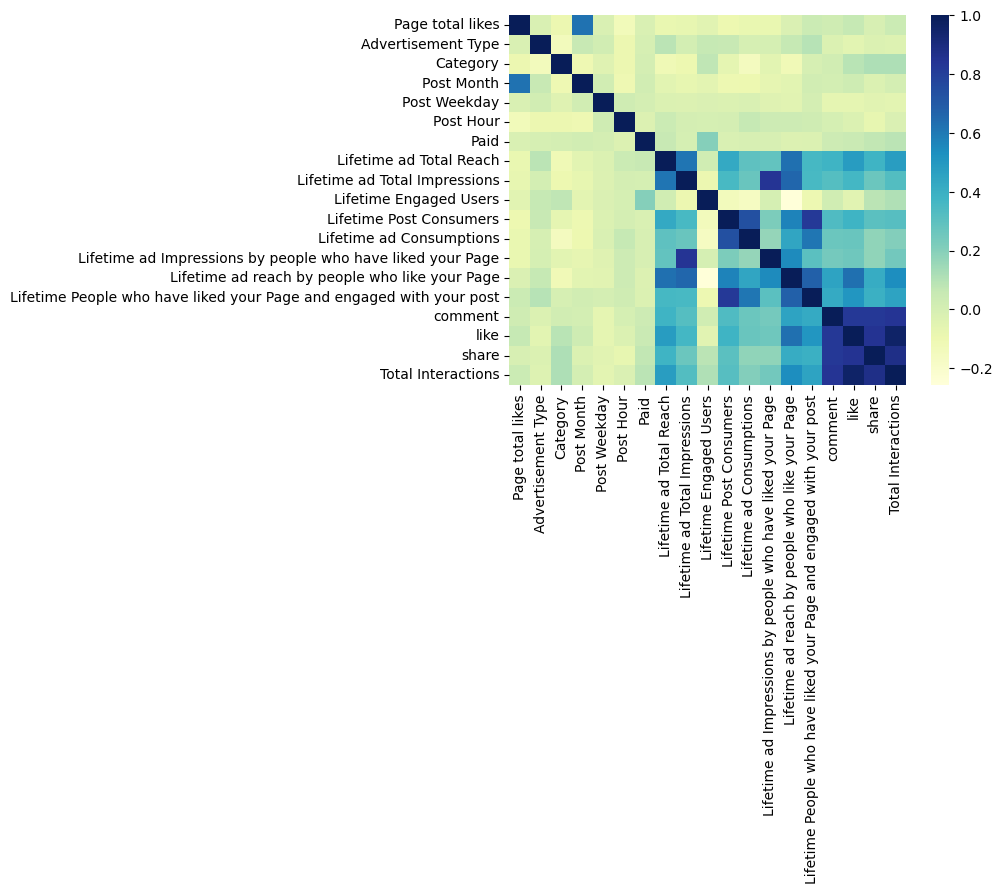

Index(['Page total likes', 'Advertisement Type', 'Category', 'Post Month',
       'Post Weekday', 'Post Hour', 'Paid', 'Lifetime ad Total Reach',
       'Lifetime ad Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime ad Consumptions',
       'Lifetime ad Impressions by people who have liked your Page',
       'Lifetime ad reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

In [7]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=False)
  
# displaying heatmap
plt.show()
data.columns

In [8]:
data['Total Interactions'] = data['Total Interactions'].fillna(data['Total Interactions'].mean())
data['share'] = data['share'].fillna(data['share'].mean())
data['like'] = data['like'].fillna(data['like'].mean())
data['Paid'] = data['Paid'].fillna(data['Paid'].mode())
data['Category'] = data['Category'].fillna(data['Category'].mean())
print(data.isnull().sum())

Page total likes                                                       0
Advertisement Type                                                     0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   0
Lifetime ad Total Reach                                                0
Lifetime ad Total Impressions                                          0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime ad Consumptions                                               0
Lifetime ad Impressions by people who have liked your Page             0
Lifetime ad reach by people who like your Page     

In [9]:
x1 = data[['share']]
y1= data[['Total Interactions']]
model1=sm.OLS(y1,x1).fit()
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:     Total Interactions   R-squared (uncentered):                   0.841
Model:                            OLS   Adj. R-squared (uncentered):              0.841
Method:                 Least Squares   F-statistic:                              3935.
Date:                Mon, 01 May 2023   Prob (F-statistic):                   1.60e-299
Time:                        20:44:08   Log-Likelihood:                         -4814.4
No. Observations:                 746   AIC:                                      9631.
Df Residuals:                     745   BIC:                                      9635.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

 above is simple linear rgression model for 'share' as it is showing good fit for our model with 84% accuracy. 

In [10]:
x2 = data[['like']]
y2= data[['Total Interactions']]
model2=sm.OLS(y2,x2).fit()
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:     Total Interactions   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                              9777.
Date:                Mon, 01 May 2023   Prob (F-statistic):                        0.00
Time:                        20:44:45   Log-Likelihood:                         -4512.2
No. Observations:                 746   AIC:                                      9026.
Df Residuals:                     745   BIC:                                      9031.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#like shows high correlation so it is giving us 92% accuracy.

In [11]:
x3 = data.loc[:, (data.columns != 'Total Interactions')&(data.columns !='Page total likes')]
y3 = data[['Total Interactions']]
model3=sm.OLS(y3,x3).fit()
print(model3.summary())

                                 OLS Regression Results                                
Dep. Variable:     Total Interactions   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              1368.
Date:                Mon, 01 May 2023   Prob (F-statistic):                        0.00
Time:                        20:45:22   Log-Likelihood:                         -4196.8
No. Observations:                 746   AIC:                                      8428.
Df Residuals:                     729   BIC:                                      8506.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                                                                          coef    std err          t      P>|t|      [0.

In [12]:
# we will bw tackling multicollinearity using lasso regression 
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
data.fillna(data.mean(), inplace=True)

y6 = data['Total Interactions']
X6 = data[[ 'like', 'comment', 'Lifetime People who have liked your Page and engaged with your post','Advertisement Type', 
          'Post Month','Lifetime ad Total Impressions','Lifetime Engaged Users','Lifetime ad Total Reach']]
#'Lifetime ad reach by people who like your Page'= vif value increases to 5.4 and model accuracy increases to 85% hence 
#we are not including the rest of variables 
# when we include like as variable we get vif value 5.05 which slight larger than 5 but it explains alot about model i.e it takes accuracy to 94% 
# fit the Lasso regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X6, y6)

# select the important features
important_features = lasso.coef_ != 0
X_selected = X6.loc[:, important_features]

# evaluate the model
y_pred = lasso.predict(X6)
mse = mean_squared_error(y6, y_pred)
r2 = lasso.score(X6, y6)

print('Selected features:', X_selected.columns.tolist())
print('MSE:', mse)
print('R^2:', r2)

Selected features: ['like', 'comment', 'Lifetime People who have liked your Page and engaged with your post', 'Advertisement Type', 'Post Month', 'Lifetime ad Total Impressions', 'Lifetime Engaged Users', 'Lifetime ad Total Reach']
MSE: 5244.865643012645
R^2: 0.947595192087289


In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X6.values,i) for i in range (X6.shape[1])]
vif['features']=X6.columns
print(vif)

        vif                                           features
0  5.057131                                               like
1  3.709574                                            comment
2  2.690483  Lifetime People who have liked your Page and e...
3  3.304676                                 Advertisement Type
4  3.103155                                         Post Month
5  1.903999                      Lifetime ad Total Impressions
6  1.489002                             Lifetime Engaged Users
7  2.607751                            Lifetime ad Total Reach


when we include like as variable we get vif value 5.05 which slight larger than 5 but it explains alot about model i.e it takes accuracy to 94% so we will consider it as best fit . if we include share as our varible then it drops accuracy to 85% but it satisfies all vif values

In [14]:
data['predicted']=lasso.predict(X6)
data

,Page total likes,Advertisement Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime ad Total Reach,Lifetime ad Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime ad Consumptions,Lifetime ad Impressions by people who have liked your Page,Lifetime ad reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,predicted
0,130791,1,1,7,2,13,0,44464,66824,1052,930,1571,22904,14080,559,4,154.0,30.0,188,203.087123
1,119198,1,3,5,2,12,0,2718,4698,566,528,663,3601,1992,306,0,50.0,10.0,60,80.528694
2,131300,1,3,2,5,4,0,9703,5379,2664,439,155,12667,592,380,3,63.0,22.0,211,123.018587
3,124940,1,3,6,5,3,1,11608,15323,985,705,940,8419,5840,594,4,330.0,29.0,363,375.829333
4,135713,1,2,10,4,1,0,5568,10282,746,545,867,5696,3162,537,13,319.0,55.0,387,378.052669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,133594,1,2,8,7,10,1,3934,6330,512,437,599,5010,3082,384,3,113.0,17.0,133,146.962250
742,119198,1,3,5,6,6,0,2812,4954,536,485,672,3382,1853,323,4,79.0,16.0,99,118.986474
743,125612,1,2,6,7,11,0,3558,5396,621,568,775,3708,2392,403,0,78.0,16.0,94,106.982541
744,138329,1,2,11,1,7,1,6327,5921,7657,330,54,1589,586,489,1,100.0,42.0,313,182.857872
